<a href="https://colab.research.google.com/github/eduvaladao/aulas_bigdata_astro_CBPF/blob/main/Astronomical_Databases_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Essa primeira célula pode demorar alguns minutos...

In [ ]:
!git clone https://github.com/oliveirara/astro-class.git
!pip install pyvo
!pip install astroquery
!wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
!chmod +x Anaconda3-2020.02-Linux-x86_64.sh
!bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!conda config --add channels conda-forge
!conda install -c conda-forge astromatic-stiff -y

Cloning into 'astro-class'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 9), reused 22 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.
Checking out files: 100% (24/24), done.
     |████████████████████████████████| 802 kB 15.3 MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=3e69386403c151d6d5f9f186e60fc6eb602ef81e897353606a94740e1b23e8b2
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built mimeparse
     |████████████████████████████████| 4.4 MB 15.5 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 3.5 MB 53.4 MB/s 
--2021-10-07 17:36:50--  https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

from astropy import units as u
from astropy.coordinates import SkyCoord
from IPython.display import IFrame
from urllib.request import urlretrieve
from PIL import Image
from pyvo.dal import sia
from astroquery.sdss import SDSS

# 1. Survey Overview

Daremos uma breve introdução a um dos mais comuns surveys em astronomia:
- **DES** (Dark Energy Survey)
- **HSC** (Hyper Suprime-Cam Subaru Strategic Program)
- **KiDS** (Kilo-Degree Survey)
- **Legacy** (DESI Legacy Imaging Surveys)
- **SDSS** (Sloan Digital Sky Survey)

## DES

Dark Energy Survey (DES) é um levantamento no ótico/infravermelho cujo objetivo é estudar a dinâmica da expansão do universo e o crescimento das estruturas em grande escala.
* Observou o céu nas bandas g, r, i, z, e Y;
* ~700 milhões de objetos distintos.

[Fonte](https://en.wikipedia.org/wiki/Dark_Energy_Survey)

<img src="https://www.darkenergysurvey.org/wp-content/uploads/2015/04/DESObservingStrategy_Lahav2016.png" alt="DES Footprint" style="height: 400px;"/>

## HSC

HSC-SSP (Hyper Suprime-Cam Subaru Strategic Program): programa de imageamento usando a Hyper Suprime-Cam (HSC) no telescópio Subaru.

* Excelente qualidade de imagem;
* ~1200° quadrados observando nas bandas g, r, i, z e Y;

[Fonte](https://hsc-release.mtk.nao.ac.jp/doc/index.php/survey__pdr3/)

<img src="https://hsc.mtk.nao.ac.jp/ssp/wp-content/uploads/2016/02/survey_fields-800x290.gif" alt="HSC Footprint" style="height: 250px;"/>

## KiDS

KiDS, the Kilo-Degree Survey, is a large optical imaging survey in the Southern sky, designed to tackle some of the most fundamental questions of cosmology and galaxy formation of today. Using the VLT Survey Telescope (VST), located at the ESO Paranal Observatory, KiDS has mapped 1350 square degrees of the night sky in four broad-band filters (u, g, r, i).


KiDS (Kilo-Degree Survey) é um survey de imageamento ótico no hemisfério sul.

* Mapeou ~1350° quadrados observando nas bandas u, g, r e i;
* Diversa quantidade de dados e estudos como o cisalhamento cósmico e lenteamento gravitacional fraco.

[Fonte](kids.strw.leidenuniv.nl/)

<img src="http://astro.dur.ac.uk/Cosmology/vstatlas/surveymap.jpg" alt="KiDS Footprint" style="height: 400px;"/>

## Legacy

Combinação de 3 projetos (Dark Energy Camera Legacy Survey, Beijing-Arizona Sky Survey e Mayall z-band Legacy Survey).
* ~14000° quadrados observados nas bandas g, r e z;
* 1.969.942.678 objetos detectados.

[Fonte 1](https://iopscience.iop.org/article/10.3847/1538-3881/ab089d)
[Fonte 2](https://www.legacysurvey.org/dr9/description/)

<img src="https://datalab.noirlab.edu/img/lsdr8-fig1.jpg" alt="Legacy Footprint" style="height: 500px;"/>

## SDSS

Iniciado em 2000, este survey coleta uma grande quantidade dados fotométricos e espectroscópicos de diversas galáxias, aglomerado de galáxias, estrelas, etc.
* ~8000° quadrados observados nas bandas u, g, r, i e z;
* 200 milhões de objetos celestes; 
* Espectro de mais de 675 mil galáxias, 90 mil quasares e 185 mil estrelas.

[Fonte](https://en.wikipedia.org/wiki/Sloan_Digital_Sky_Survey)

<img src="https://www.sdss.org/wp-content/uploads/2017/04/footprint_DR14_Mollweide_cut.png" alt="SDSS Footprint" style="height: 250px;"/>

# 2. Dados de Alguns Surveys

Nesta seção do notebook vamos mostrar algumas interfaces para se obter alguns dados de objetos catalogados por alguns surveys mencionados no notebook anterior.

## SDSS Sky Server

Na [página](https://www.sdss.org/dr16/data_access/) da última release de dados do SDSS (DR16) você encontrará **diversas** ferramentas para obter dados fotométricos e espectroscópios de vários objetos encontrados no survey.

In [ ]:
IFrame('http://skyserver.sdss.org/dr16/en/home.aspx', width=900, height=600)

* Visual Tools:
    * **[Navigate](http://skyserver.sdss.org/dr16/en/tools/chart/navi.aspx)**: explorador visual;
    * **[Explore](https://skyserver.sdss.org/dr12/en/tools/explore/Summary.aspx?)**: mostra várias informações como o espectro visivel do objeto/Download de arquivos com os espectros e outras informações.
* [CrossID](http://skyserver.sdss.org/dr16/en/tools/crossid/crossid.aspx):
    * Queries: procurar por objetos específicos (ID único do SDSS) ou propriedades especícios para construir algum catálogo.
    * Ferramenta interessante para aprender SQL já que mostra alguns exemplos da sintaxe e como filtrar melhor os dados.
* [CasJobs](https://skyserver.sdss.org/casjobs/):
    * Queries: mesmo do CrossID porém você consegue criar "Jobs" usando [SQL](http://skyserver.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx) e obter diversas informações de vários objetos e no final gerar uma tabela em CSV com $z$, $\sigma_v$, $\mathrm{magnitude}$, ...
    * É necessário criar uma conta (posso mostrar um exemplo caso alguém esteja interessado em usar).

## Legacy Sky Viewer:

Visualização multi-camada dos objetos do Legacy survey (+ alguns outros surveys):
* É possível baixar as imagens (FITS, png);
* Ver informações do objeto no SIMBAD 🦁 (http://simbad.u-strasbg.fr/simbad/);

In [ ]:
IFrame('https://www.legacysurvey.org/viewer?ra=193.5650&dec=22.3640&layer=ls-dr9&zoom=12', width=1000, height=600)

## AstroWISE:

Dados de vários telescópios europeus e surveys de grande área (incluindo o KiDS)

In [ ]:
IFrame('http://www.astro-wise.org/portal/aw_services.shtml', width=1000, height=600)

## Astro Data Lab

Acesso a dados de diversos surveys (listados abaixo) além de promover uma infraestrutura de acesso aos dados usando o Jupyter Hub e um sistema de [perguntas e respostas](https://datalab.noirlab.edu/docs.php) comunitário.

Surveys:

1. DECaPS
2. DELVE
3. DES
4. Legacy Survey
5. NOIRLab Source Catalog
6. SMASH
7. DECam Asteroid Database
8. DES SVA1
9. GAIA
10. GOGREEN
11. NSC DR1/DR2
12. PHAT
13. SDSS DR13
14. SPLUS
15. UNWISE
16. USNO

* Para usar o Jupyter Lab do Astro Data Lab é necessário criar uma conta (não precisa ter vínculo);
* Essa interface permite o usuário obter as imagens de cada objeto (usando a ferramenta de cutout ou o Data Lab);
* Automação dos dados (sem precisar usar o CasJobs por exemplo. Veja que só está disponível ainda os dados do SDSS DR13. A última versão é a DR16).
* Combinar catálogos de vários banco de dados;
* Processamento feito na nuvem;

<img src="https://noirlab.edu/science/sites/default/files/styles/screen/public/media/archives/images/NCSdr1_footprint.png.jpeg?itok=Gf4x4NkI" alt="NSC Footprint" style="height: 400px;"/>

In [ ]:
IFrame('https://datalab.noirlab.edu', width=1000, height=600)

* [Jupyter-Lab](https://gp12.datalab.noao.edu/hub/login)
* [Docs](https://datalab.noirlab.edu/docs/manual/index.html) (muito importante a leitura dos exemplos)
* [Notebooks atualizados](https://github.com/noaodatalab/notebooks-latest): repositório atualizado com vários notebooks de exemplo em como usar o Astro Data Lab;

# 3. Exercícios

Nesta seção do notebook vamos desenvolver as seguintes atividades:
* Obter imagens de objetos encontrados no Legacy Survey e HSC;
* Combinar as imagens (no formato FITS) usando o STIFF (usando as configurações básicas);
* Download e plot de espectros dos mesmos objetos usando os dados do SDSS;

_Obviamente você pode obter muito mais informações (dependendo do que você está interessadx)._

Vamos extrair as imagens do objeto localizado em RA: 221.5154 e DEC: 43.0748. Antes, vamos aprender a converter unidades usando o `astropy` pois geralmente as posições de objetos astronômicos são dados no formato `HH:MM:SS.ss +/- DD:MM:SS.ss`:

In [ ]:
ra = 221.5154
dec = 43.0748

In [ ]:
coordinate = SkyCoord(ra, dec, unit=(u.deg, u.deg))
coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (221.5154, 43.0748)>

In [ ]:
coordinate.to_string("hmsdms", precision=2)

'14h46m03.70s +43d04m29.28s'

Caso contrário:

In [ ]:
coords = '14h46m03.70s +43d04m29.28s' # ou '14:46:03.70 +43:04:29.28'
coordinate = SkyCoord(coords, unit=(u.hourangle, u.deg))
coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (221.51541667, 43.0748)>

Para realizar o download das imagens do Legacy survey podemos tanto usar o [Legacy Sky Viewer](https://www.legacysurvey.org/viewer) quanto as ferramentas oficiais de cutouts de casa um dos surveys, e.g. usando o [Astro Data Lab](https://datalab.noirlab.edu/sia.php) e a [Ferramenta de Cutout do HSC](https://hsc-release.mtk.nao.ac.jp/doc/index.php/data-access__pdr3/).


Problemas em usar o Legacy Sky Viewer:
1. Não contém imagens em todas as bandas;
2. Algumas informações nos `Headers` não estão disponíveis;
3. Cutouts podem estar desatualizados. Ainda não está disponível os dados do DR3 do HSC;
4. Nem todos os demais surveys são contemplados.

Vantagem em usar o Legacy Sky Viewer:
1. Facilidade em acesso aos cutouts;
2. Imagens já pré-processadas no RGB.

In [ ]:
IFrame('https://www.legacysurvey.org/viewer?ra=221.5154&dec=43.0748&layer=hsc-dr2&zoom=13', width=900, height=600)

In [ ]:
IFrame('http://skyserver.sdss.org/dr16/en/tools/explore/Summary.aspx?id=1237658203985936492', width=900, height=600)

## Cutouts:

Para mais informações, veja esse [notebook](https://github.com/noaodatalab/notebooks-latest/blob/master/01_GettingStartedWithDataLab/02_GettingStartedWithDataLab.ipynb).

In [ ]:
DEF_ACCESS_URL = "https://datalab.noao.edu/sia/ls_dr8" # Legacy SIA service URL
svc = sia.SIAService(DEF_ACCESS_URL)

In [ ]:
ra, dec = 221.5154, 43.0748

imgTable = svc.search((ra,dec), (0.0666667, 0.0666667), intersect='CENTER', verbosity=2).to_table()
imgTable = imgTable[imgTable['prodtype']=='image'].to_pandas()
imgTable

/usr/local/lib/python3.7/dist-packages/cryptography/hazmat/backends/openssl/x509.py:18: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,


assoc_id                                         access_url  ... mjd_obs  elliptic
0   ls_dr8  https://datalab.noao.edu/svc/cutout?col=ls_dr8...  ...                 0
1   ls_dr8  https://datalab.noao.edu/svc/cutout?col=ls_dr8...  ...                 0
2   ls_dr8  https://datalab.noao.edu/svc/cutout?col=ls_dr8...  ...                 0

[3 rows x 61 columns]

In [ ]:
path = './astro-class/images/'
for i in range(len(imgTable)):
    url, band, ID = imgTable[['access_url', 'obs_bandpass', 'assoc_id']].iloc[i]
    file_name = f'{ID}_ra_{ra}_dec_{dec}_band_{band}.fits.fz'
    urlretrieve(url, path+file_name)

Para baixar as imagens da HSC, é necessário criar uma conta para ter acesso ao banco de dados para usar o `DAS Cutout (PDR3)`. Caso você esteja interessado em scripts para automatizar o acesso aos dados, entre em contato comigo. As imagens já baixadas do objeto em questão (e do exercício) estão na pasta `images`.

## STIFF:

Vamos combinar imagens baixadas usando o `STIFF` (software que combina imagens nas bandas selecionadas em imagens RGB). Como você está usando o Binder, ele já deve estar instaldo. Caso contrário, recomendo instalá-lo usando o `conda` (ou `mamba`):

`conda install -c conda-forge astromatic-source-extractor` 
ou `mamba install -c conda-forge astromatic-source-extractor`

O STIFF é um software que funciona via linha de comando. Podemos criar um `wrapper` no Python onde você fornece alguns parâmetros ao software e os passa ao STIFF usando o `subprocess.call`. A função abaixo faz isso de forma simplista:

In [ ]:
def call_STIFF(File_Path,  # If single name, just the file. If RGB image, image_red image_green image_blue
               File_Name, 
               Bits = 16,                # 8, 16, -32
               Gamma_Type = 'REC.709',   # 'SRGB' or 'POWER-LAW'
               Gamma = 2.2,              # Display gamma
               Gamma_Fac = 1.0,          # Luminance gamma correction factor
               Colour_Sat = 1.0,         # Colour saturation (0.0 = B&W)
               Negative = 'N',           # Make negative of the image
               Verbose = 'QUIET',        # 'QUIET', 'NORMAL' or 'FULL'
               Copy_Header = 'N',        # Copy FITS header to description field?
               Write_XML = 'N',          # Write XML file (Y/N)?
               NThreads = 4):            # Parallel processing
    general = f'-OUTFILE_NAME {File_Name} -BITS_PER_CHANNEL {Bits} '
    dynamic_range = f'-GAMMA_TYPE {Gamma_Type} -GAMMA {Gamma} -GAMMA_FAC {Gamma_Fac} -COLOUR_SAT {Colour_Sat} -NEGATIVE {Negative} '
    misc = f'-VERBOSE_TYPE {Verbose} -COPY_HEADER {Copy_Header} -WRITE_XML {Write_XML} -NTHREADS {NThreads} -COMPRESSION_QUALITY 100 -SATUR_LEVEL 100000'
    stiff_call = f'stiff {File_Path} '+general+dynamic_range+misc
    return subprocess.call(stiff_call, shell=True, \
                stderr=subprocess.DEVNULL) # Hide outputs from STIFF

Para combinar as imagens em RGB tanto da HSC quanto do Legacy Survey, usaremos a seguinte lógica para as bandas:

* R: i, y, ou z
* G: r
* B: g

Note que temos um problema com o nome dado ao arquivo do Legacy na banda `z`. Vamos substituir o espaço por `_`.

In [ ]:
os.rename('./astro-class/images/ls_dr8_ra_221.5154_dec_43.0748_band_zd DECam k1038.fits.fz', './astro-class/images/ls_dr8_ra_221.5154_dec_43.0748_band_zd_DECam_k1038.fits.fz')

In [ ]:
call_STIFF(File_Path = './astro-class/images/ls_dr8_ra_221.5154_dec_43.0748_band_zd_DECam_k1038.fits.fz' + ' ' + \
           './astro-class/images/ls_dr8_ra_221.5154_dec_43.0748_band_bokr.fits.fz' + ' ' + \
           './astro-class/images/ls_dr8_ra_221.5154_dec_43.0748_band_g.fits.fz', File_Name = f'./astro-class/images_STIFF/Legacy_ra_{ra}_dec_{dec}.tif')

0

In [ ]:
call_STIFF(File_Path = './astro-class/images/HSC_ra_14:46:03.70_dec_+43:04:29.28_band_I.fits[1]' + ' ' + \
           './astro-class/images/HSC_ra_14:46:03.70_dec_+43:04:29.28_band_R.fits[1]' + ' ' + \
           './astro-class/images/HSC_ra_14:46:03.70_dec_+43:04:29.28_band_G.fits[1]', File_Name = f'./astro-class/images_STIFF/HSC_ra_{ra}_dec_{dec}.tif')

0

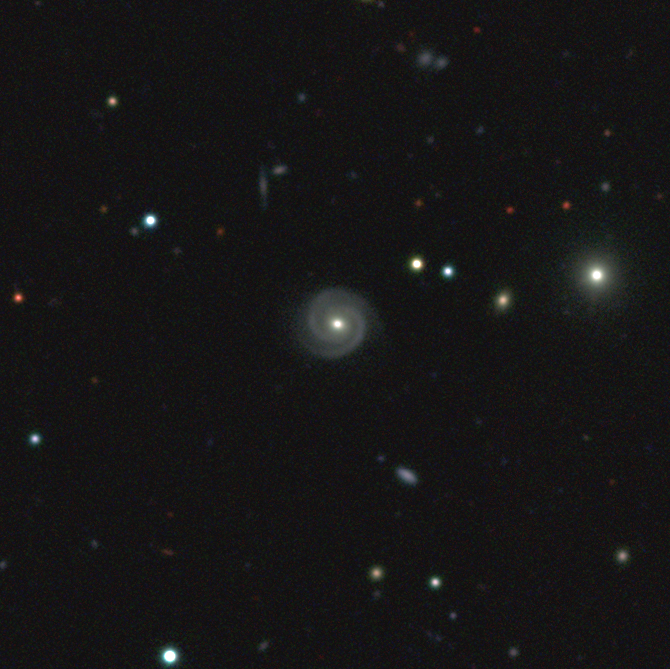

In [ ]:
Image.open('./astro-class/images_STIFF/Legacy_ra_221.5154_dec_43.0748.tif')

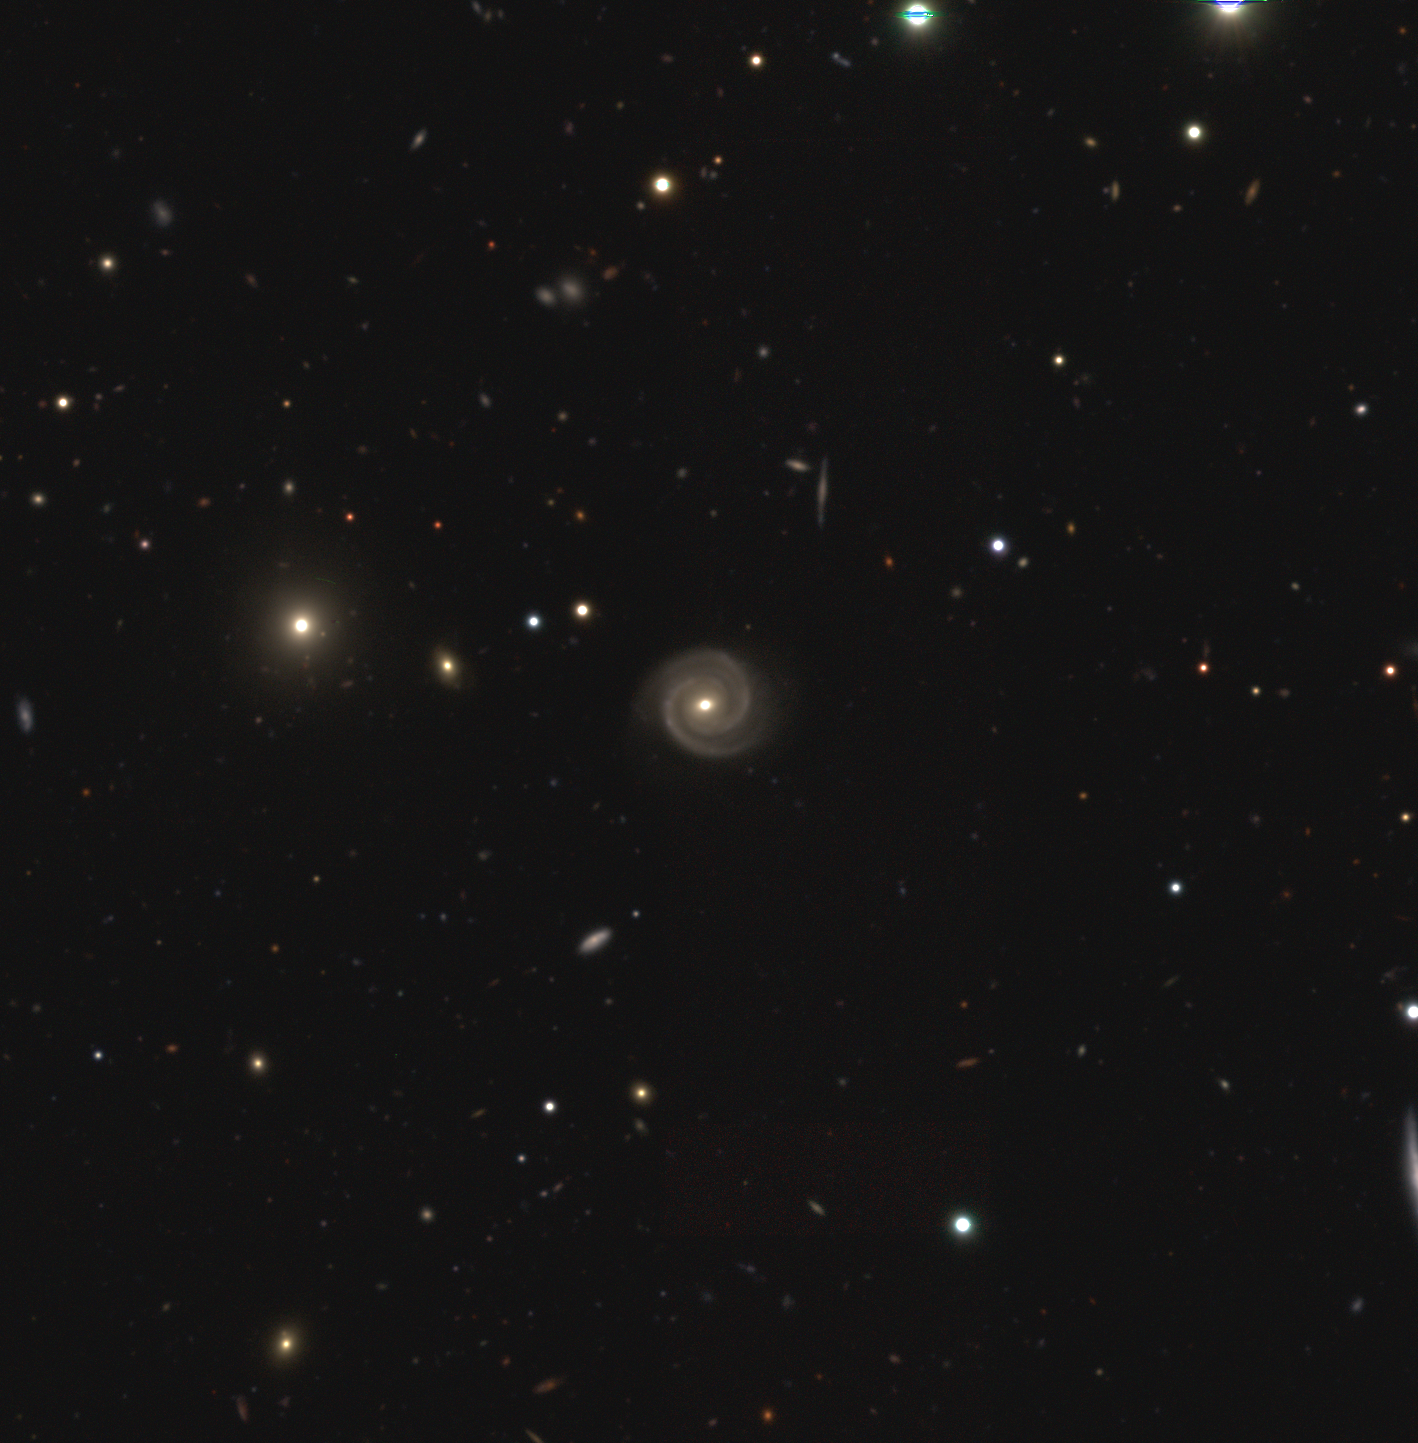

In [ ]:
Image.open('./astro-class/images_STIFF/HSC_ra_221.5154_dec_43.0748.tif')

Vamos baixar agora o espectro da galáxia em questão usando o [`astroquery`](https://astroquery.readthedocs.io/en/latest/sdss/sdss.html). Para isso primeiro precisamos saber qual é o ID da galáxia:

In [ ]:
pos = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
xid = SDSS.query_region(pos, spectro=True, radius=10*u.arcsec)
xid

/usr/local/lib/python3.7/dist-packages/astroquery/sdss/core.py:865: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


<Table length=1>
       ra              dec              objid        ... run2d instrument
    float64          float64            int64        ... int64   bytes4  
---------------- --------------- ------------------- ... ----- ----------
221.515673301106 43.075585516366 1237658203985936492 ...    26       SDSS

In [ ]:
sp = SDSS.get_spectra(matches=xid)
# im = SDSS.get_images(matches=xid, band='g') # Caso você queira baixar a imagem do objeto na banda g

`Header` primário do arquivo espectral para a galáxia em questão:

In [ ]:
sp[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4556252295.98 / 1st row - Number of seconds since Nov 17 1858  
RA      =            220.84586 / 1st row - Right ascension of telescope boresigh
DEC     =            44.014373 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:25:17.65'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                52734 / MJD of observation                             
MJDLIST = '52734   '        

Para pegarmos o espectro, precisamos acessar o objeto de índice `[1]`:

In [ ]:
sp[0][1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3839 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [ ]:
flux = sp[0][1].data['flux']
wavelength = sp[0][1].data['loglam']

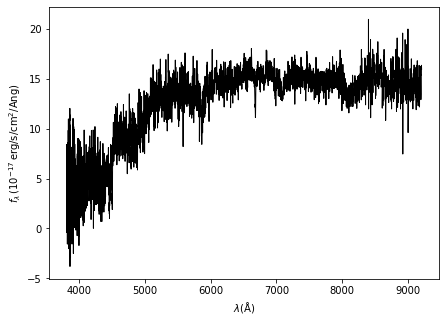

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(10**wavelength, flux, '-k', lw=1) 

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel(r'$f_\lambda\,(10^{-17}\,\mathrm{erg/s/cm^2/Ang})$')

plt.show()

### Exercício: 
Obtenha as imagens e o espectro dos objetos abaixo:

1. RA: 222.9995, DEC: 43.7210
2. RA: 226.8585, DEC: 42.9080